In [ ]:
import math
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
# allow plots to appear directly in the notebook
%matplotlib inline

In [ ]:
pd.set_option("display.max_rows", 1000)    #Set the maximum display to 1000 rows
pd.set_option("display.max_columns", 1000) #Set the maximum display to 1000 rows

In [ ]:
calendar=pd.read_csv('calendar.csv')

In [ ]:
sales=pd.read_csv('sales_train_validation.csv')

In [ ]:
sample_submission=pd.read_csv('sample_submission.csv')

In [ ]:
price=pd.read_csv('sell_prices.csv')

In [ ]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [ ]:
sales

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,d_45,d_46,d_47,d_48,d_49,d_50,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70,d_71,d_72,d_73,d_74,d_75,d_76,d_77,d_78,d_79,d_80,d_81,d_82,d_83,d_84,d_85,d_86,d_87,d_88,d_89,d_90,d_91,d_92,d_93,d_94,d_95,d_96,d_97,d_98,d_99,d_100,d_101,d_102,d_103,d_104,d_105,d_106,d_107,d_108,d_109,d_110,d_111,d_112,d_113,d_114,d_115,d_116,d_117,d_118,d_119,d_120,d_121,d_122,d_123,d_124,d_125,d_126,d_127,d_128,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,d_154,d_155,d_156,d_157,d_158,d_159,d_160,d_161,d_162,d_163,d_164,d_165,d_166,d_167,d_168,d_169,d_170,d_171,d_172,d_173,d_174,d_175,d_176,d_177,d_178,d_179,d_180,d_181,d_182,d_183,d_184,d_185,d_186,d_187,d_188,d_189,d_190,d_191,d_192,d_193,d_194,d_195,d_196,d_197,d_198,d_199,d_200,d_201,d_202,d_203,d_204,d_205,d_206,d_207,d_208,d_209,d_210,d_211,d_212,d_213,d_214,d_215,d_216,d_217,d_218,d_219,d_220,d_221,d_222,d_223,d_224,d_225,d_226,d_227,d_228,d_229,d_230,d_231,d_232,d_233,d_234,d_235,d_236,d_237,d_238,d_239,d_240,d_241,d_242,d_243,d_244,d_245,d_246,d_247,d_248,d_249,d_250,d_251,d_252,d_253,d_254,d_255,d_256,d_257,d_258,d_259,d_260,d_261,d_262,d_263,d_264,d_265,d_266,d_267,d_268,d_269,d_270,d_271,d_272,d_273,d_274,d_275,d_276,d_277,d_278,d_279,d_280,d_281,d_282,d_283,d_284,d_285,d_286,d_287,d_288,d_289,d_290,d_291,d_292,d_293,d_294,d_295,d_296,d_297,d_298,d_299,d_300,d_301,d_302,d_303,d_304,d_305,d_306,d_307,d_308,d_309,d_310,d_311,d_312,d_313,d_314,d_315,d_316,d_317,d_318,d_319,d_320,d_321,d_322,d_323,d_324,d_325,d_326,d_327,d_328,d_329,d_330,d_331,d_332,d_333,d_334,d_335,d_336,d_337,d_338,d_339,d_340,d_341,d_342,d_343,d_344,d_345,d_346,d_347,d_348,d_349,d_350,d_351,d_352,d_353,d_354,d_355,d_356,d_357,d_358,d_359,d_360,d_361,d_362,d_363,d_364,d_365,d_366,d_367,d_368,d_369,d_370,d_371,d_372,d_373,d_374,d_375,d_376,d_377,d_378,d_379,d_380,d_381,d_382,d_383,d_384,d_385,d_386,d_387,d_388,d_389,d_390,d_391,d_392,d_393,d_394,d_395,d_396,d_397,d_398,d_399,d_400,d_401,d_402,d_403,d_404,d_405,d_406,d_407,d_408,d_409,d_410,d_411,d_412,d_413,d_414,d_415,d_416,d_417,d_418,d_419,d_420,d_421,d_422,d_423,d_424,d_425,d_426,d_427,d_428,d_429,d_430,d_431,d_432,d_433,d_434,d_435,d_436,d_437,d_438,d_439,d_440,d_441,d_442,d_443,d_444,d_445,d_446,d_447,d_448,d_449,d_450,d_451,d_452,d_453,d_454,d_455,d_456,d_457,d_458,d_459,d_460,d_461,d_462,d_463,d_464,d_465,d_466,d_467,d_468,d_469,d_470,d_471,d_472,d_473,d_474,d_475,d_476,d_477,d_478,d_479,d_480,d_481,d_482,d_483,d_484,d_485,d_486,d_487,d_488,d_489,d_490,d_491,d_492,d_493,d_494,...,d_1414,d_1415,d_1416,d_1417,d_1418,d_1419,d_1420,d_1421,d_1422,d_1423,d_1424,d_1425,d_1426,d_1427,d_1428,d_1429,d_1430,d_1431,d_1432,d_1433,d_1434,d_1435,d_1436,d_1437,d_1438,d_1439,d_1440,d_1441,d_1442,d_1443,d_1444,d_1445,d_1446,d_1447,d_1448,d_1449,d_1450,d_1451,d_1452,d_1453,d_1454,d_1455,d_1456,d_1457,d_1458,d_1459,d_1460,d_1461,d_1462,d_1463,d_1464,d_1465,d_1466,d_1467,d_1468,d_1469,d_1470,d_1471,d_1472,d_1473,d_1474,d_1475,d_1476,d_1477,d_1478,d_1479,d_1480,d_1481,d_1482,d_1483,d_1484,d_1485,d_1486,d_1487,d_1488,d_1489,d_1490,d_1491,d_1492,d_1493,d_1494,d_1495,d_1496,d_1497,d_1498,d_1499,d_1500,d_1501,d_1502,d_1503,d_1504,d_1505,d_1506,d_1507,d_1508,d_1509,d_1510,d_1511,d_1512,d_1513,d_1514,d_1515,d_1516,d_1517,d_1518,d_1519,d_1520,d_1521,d_1522,d_1523,d_1524,d_1525,d_1526,d_1527,d_1528,d_1529,d_1530,d_1531,d_1532,d_1533,d_1534,d_1535,d_1536,d_1537,d_1538,d_1539,d_1540,d_1541,d_1542,d_1543,d_1544,d_1545,d_1546,d_1547,d_1548,d_1549,d_1550,d_1551,d_1552,d_1553,d_1554,d_1555,d_1556,d_1557,d_1558,d_1559,d_1560,d_1561,d_1562,d_1563,d_1564,d_1565,d_1566,d_1567,d_1568,d_1569,d_1

In [ ]:
price.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


### Visualization: Relation between sales and time (by month, by weekday).

In [ ]:
a=sales.sum(axis=0)
aa=pd.DataFrame(a)
aa=aa[6:]
aa.columns = ['total sales']
aa=aa.reset_index()
b=calendar[:1913]
c=pd.concat([b,aa],axis=1)
c=c.drop(['index'],axis=1)
c['date'] =  pd.to_datetime(c['date'], format='%Y-%m-%d')
c['total sales']=c['total sales'].astype('int')

In [ ]:
d=c.groupby(["month"])['total sales'].mean().reset_index()

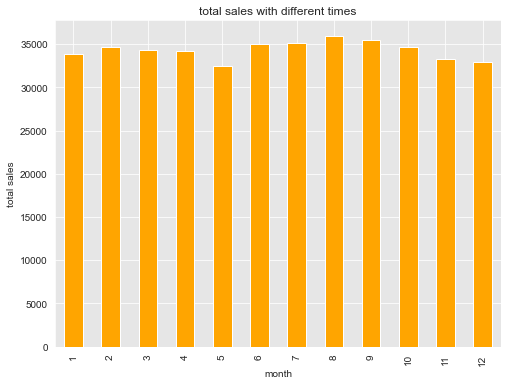

In [ ]:
d.index=d['month']
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(8,6))
d['total sales'].plot(kind='bar',color='orange')
plt.xlabel('month')
plt.ylabel("total sales")
plt.title('total sales with different times')
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
#plt.savefig('1.png',dpi=900,bbox_inches='tight')  #save the file
plt.show()

It shows that sales are the highest during the summer vacation.

In [ ]:
e=c.groupby(["weekday"])['total sales'].sum().reset_index()
e

,weekday,total sales
0,Friday,9343694
1,Monday,8968860
2,Saturday,11383849
3,Sunday,11269626
4,Thursday,8245967
5,Tuesday,8290677
6,Wednesday,8192736


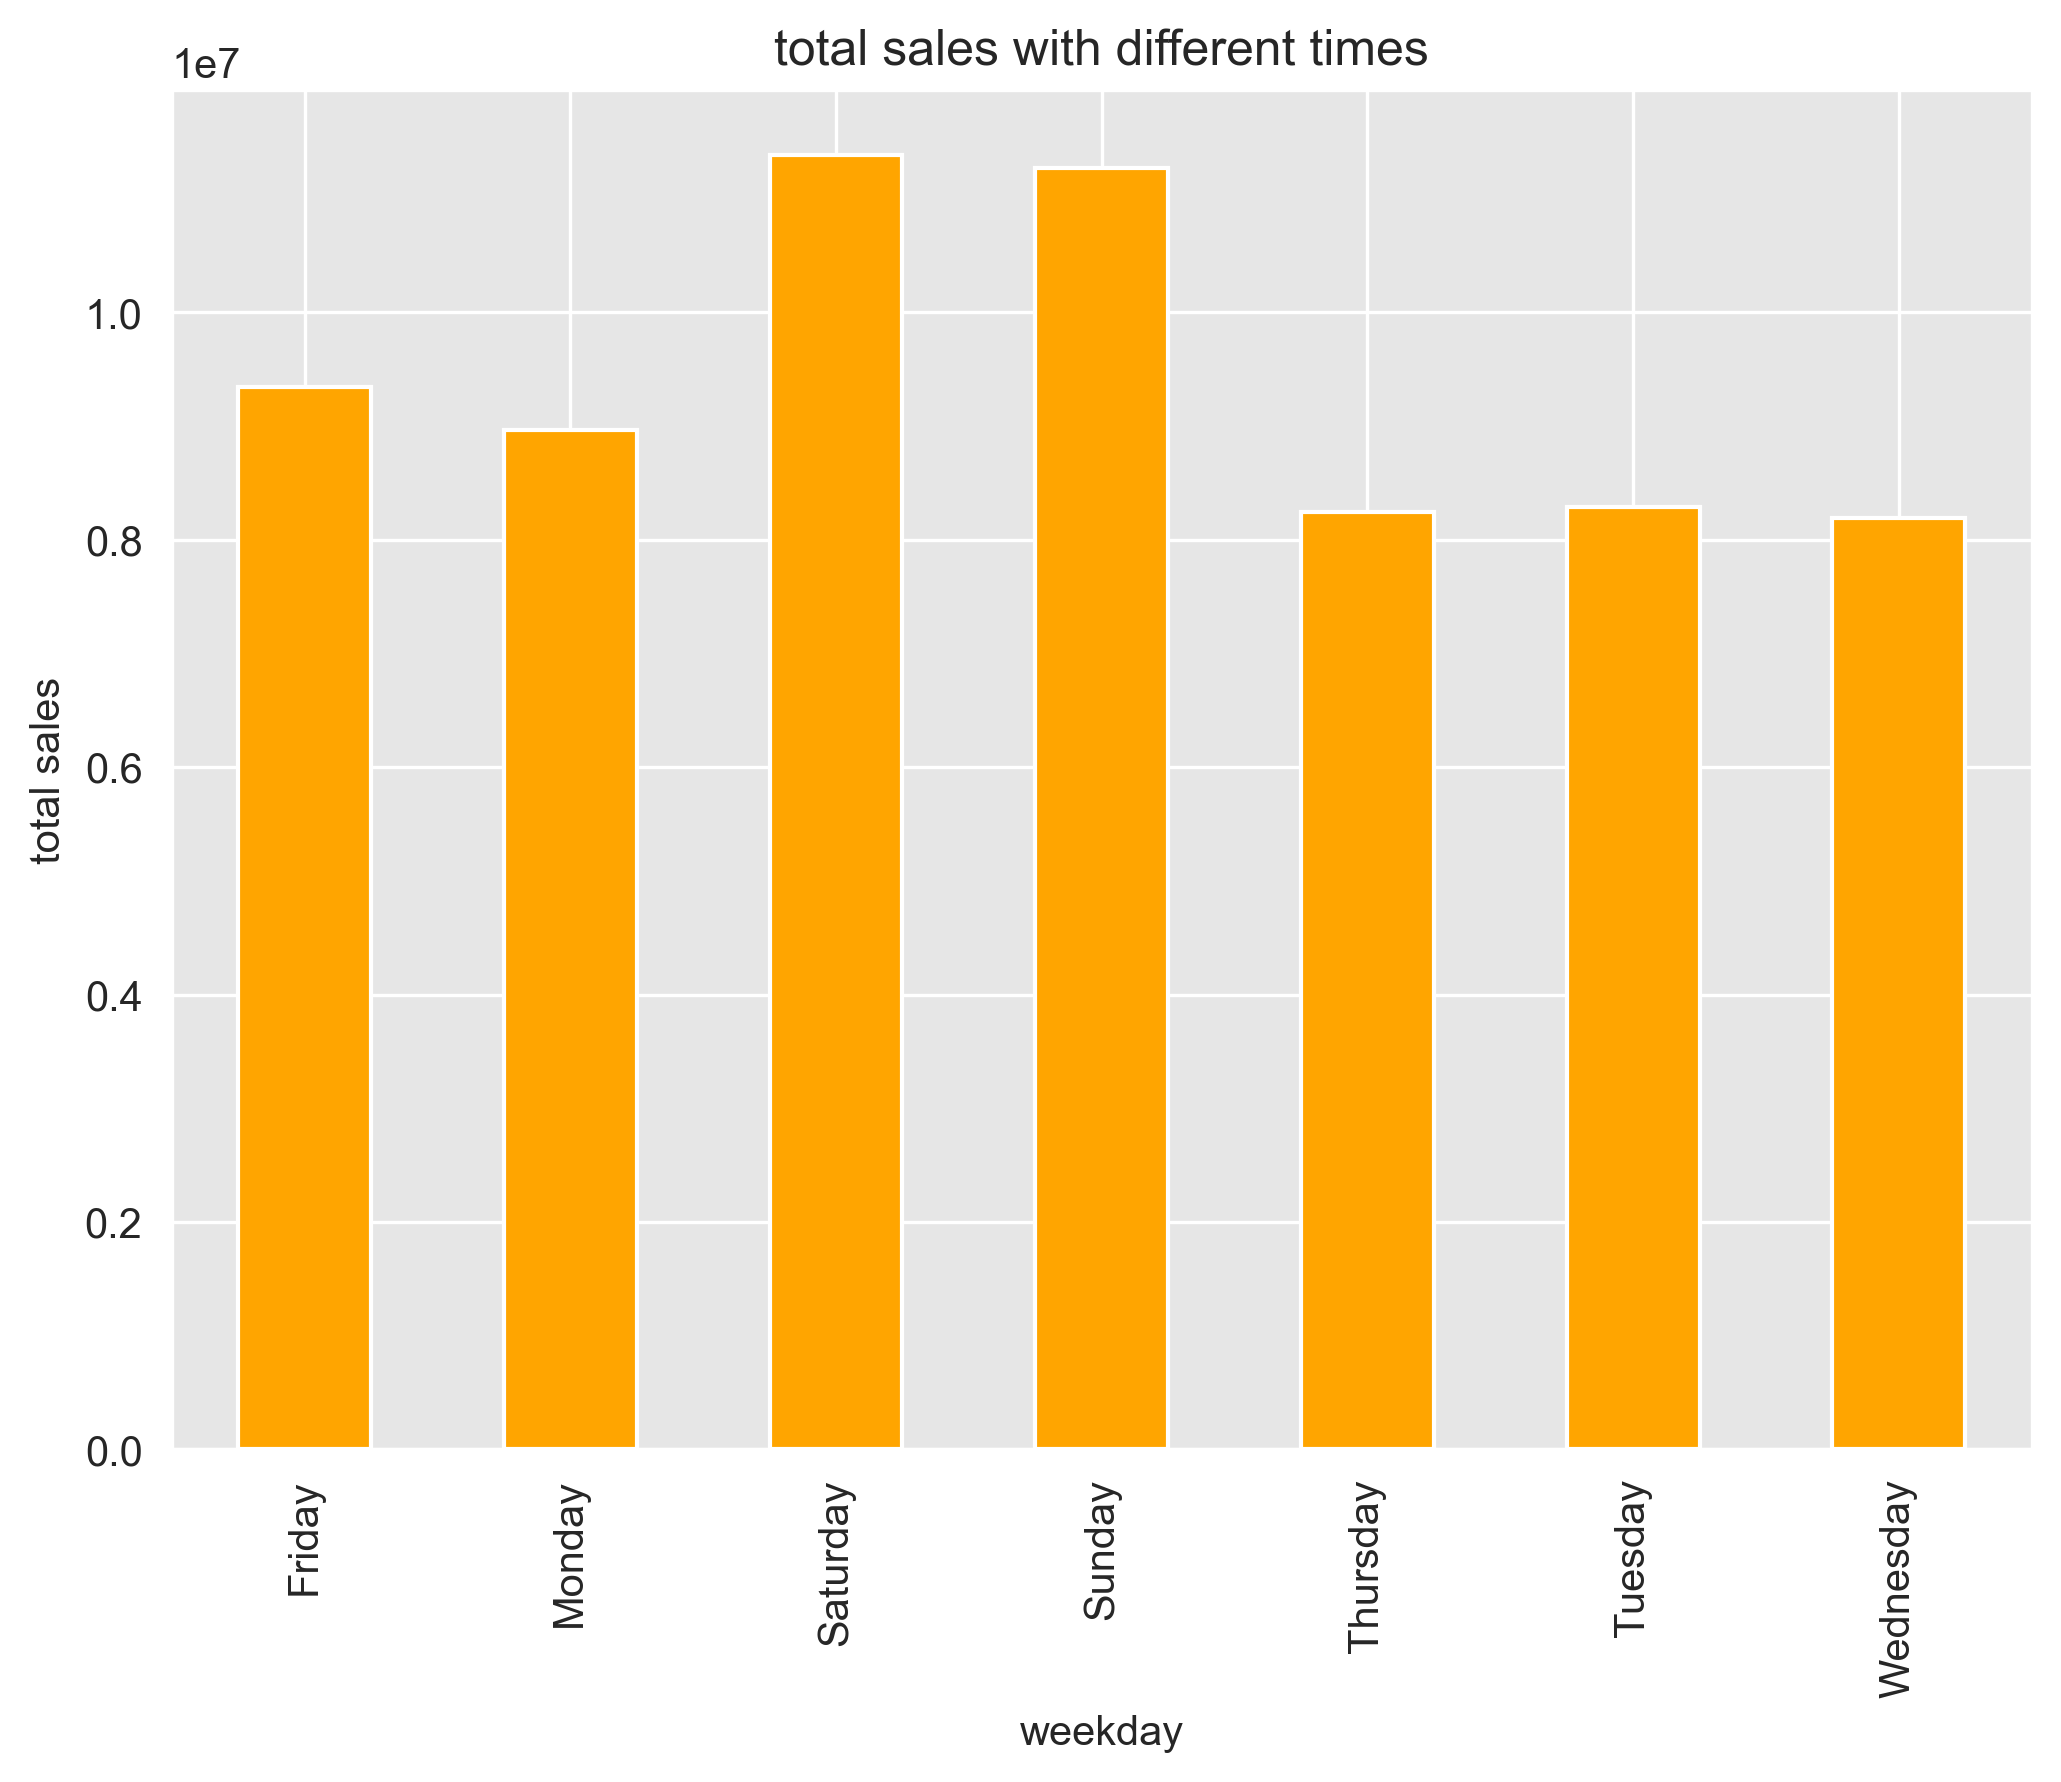

In [ ]:
e.index=e['weekday']
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(8,6))
e['total sales'].plot(kind='bar',color='orange')
plt.xlabel('weekday')
plt.ylabel("total sales")
plt.title('total sales with different times')
#plt.rcParams['savefig.dpi'] = 300
#plt.rcParams['figure.dpi'] = 300
#plt.savefig('1.png',dpi=900,bbox_inches='tight')  #save the file
plt.show()

It shows that sales are the highest during the weekends.

In [ ]:
f=c.groupby(["year"])['total sales'].mean().reset_index()
f

,year,total sales
0,2011,26280.667656
1,2012,32955.838798
2,2013,35988.364384
3,2014,35862.400000
4,2015,37810.441096
5,2016,41309.973913


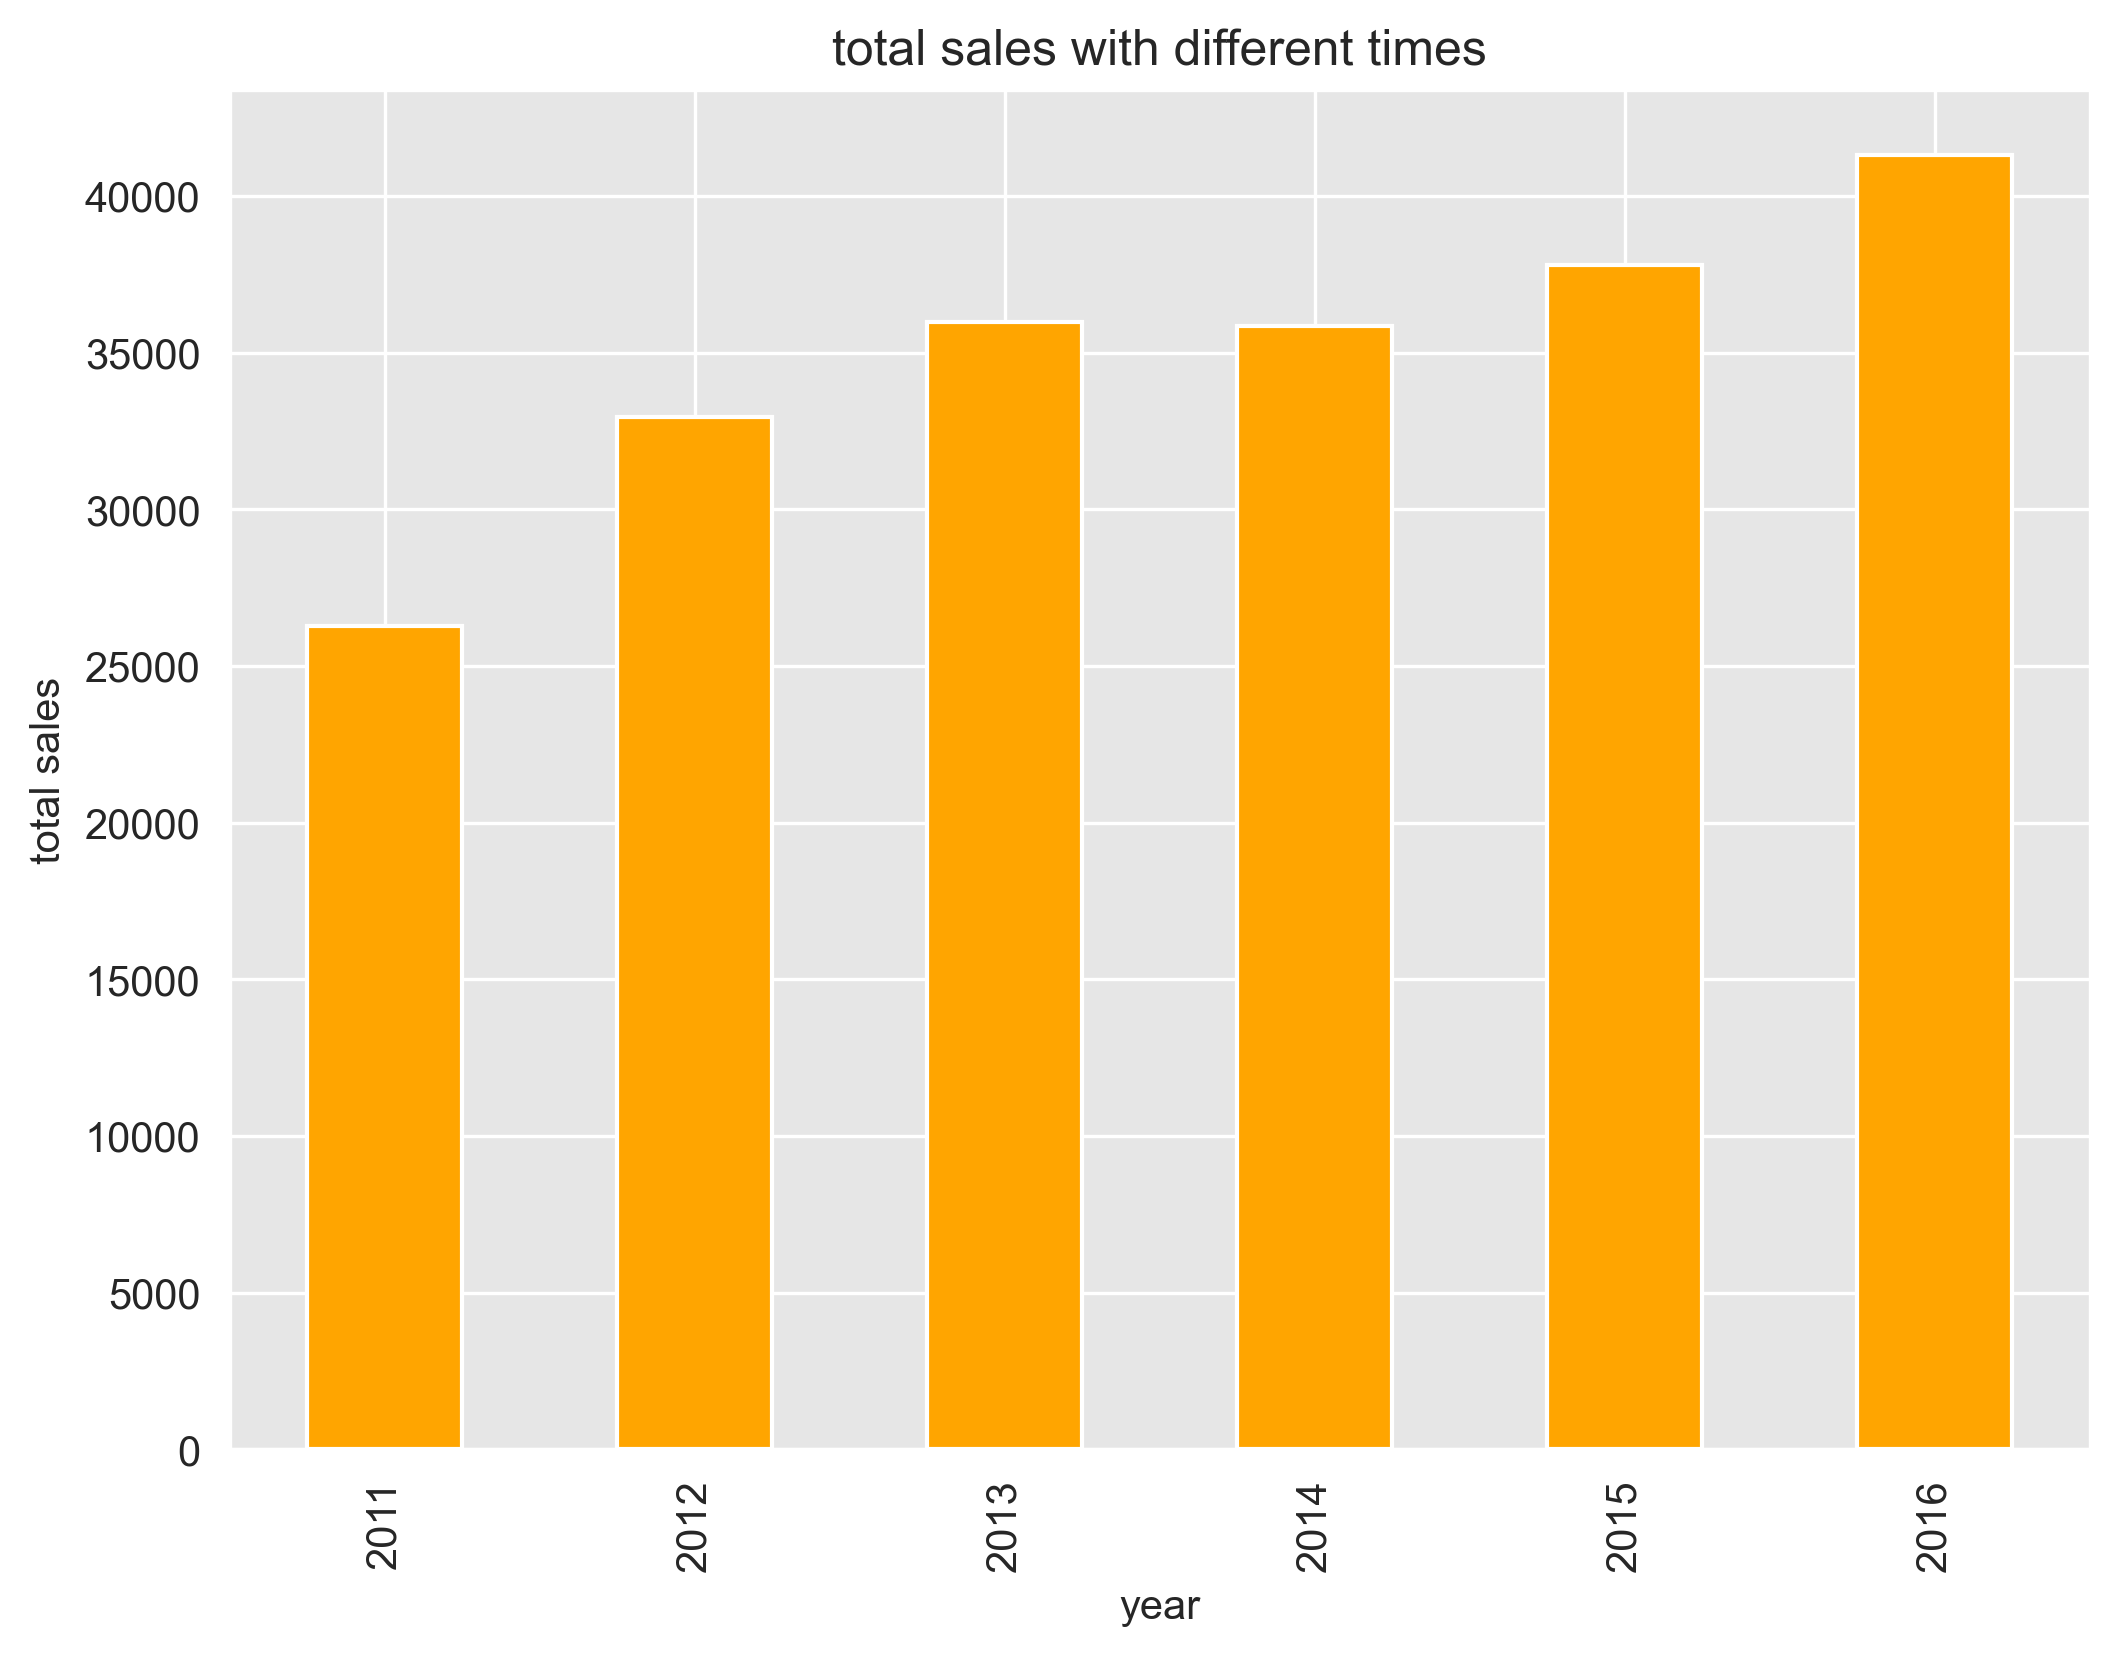

In [ ]:
f.index=f['year']
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(8,6))
f['total sales'].plot(kind='bar',color='orange')
plt.xlabel('year')
plt.ylabel("total sales")
plt.title('total sales with different times')
#plt.rcParams['savefig.dpi'] = 300
#plt.rcParams['figure.dpi'] = 300
#plt.savefig('1.png',dpi=900,bbox_inches='tight')  #存檔
plt.show()

It shows that sales have been increasing year by year.

In [ ]:
g=c.groupby(["wm_yr_wk"])['total sales'].sum().reset_index()

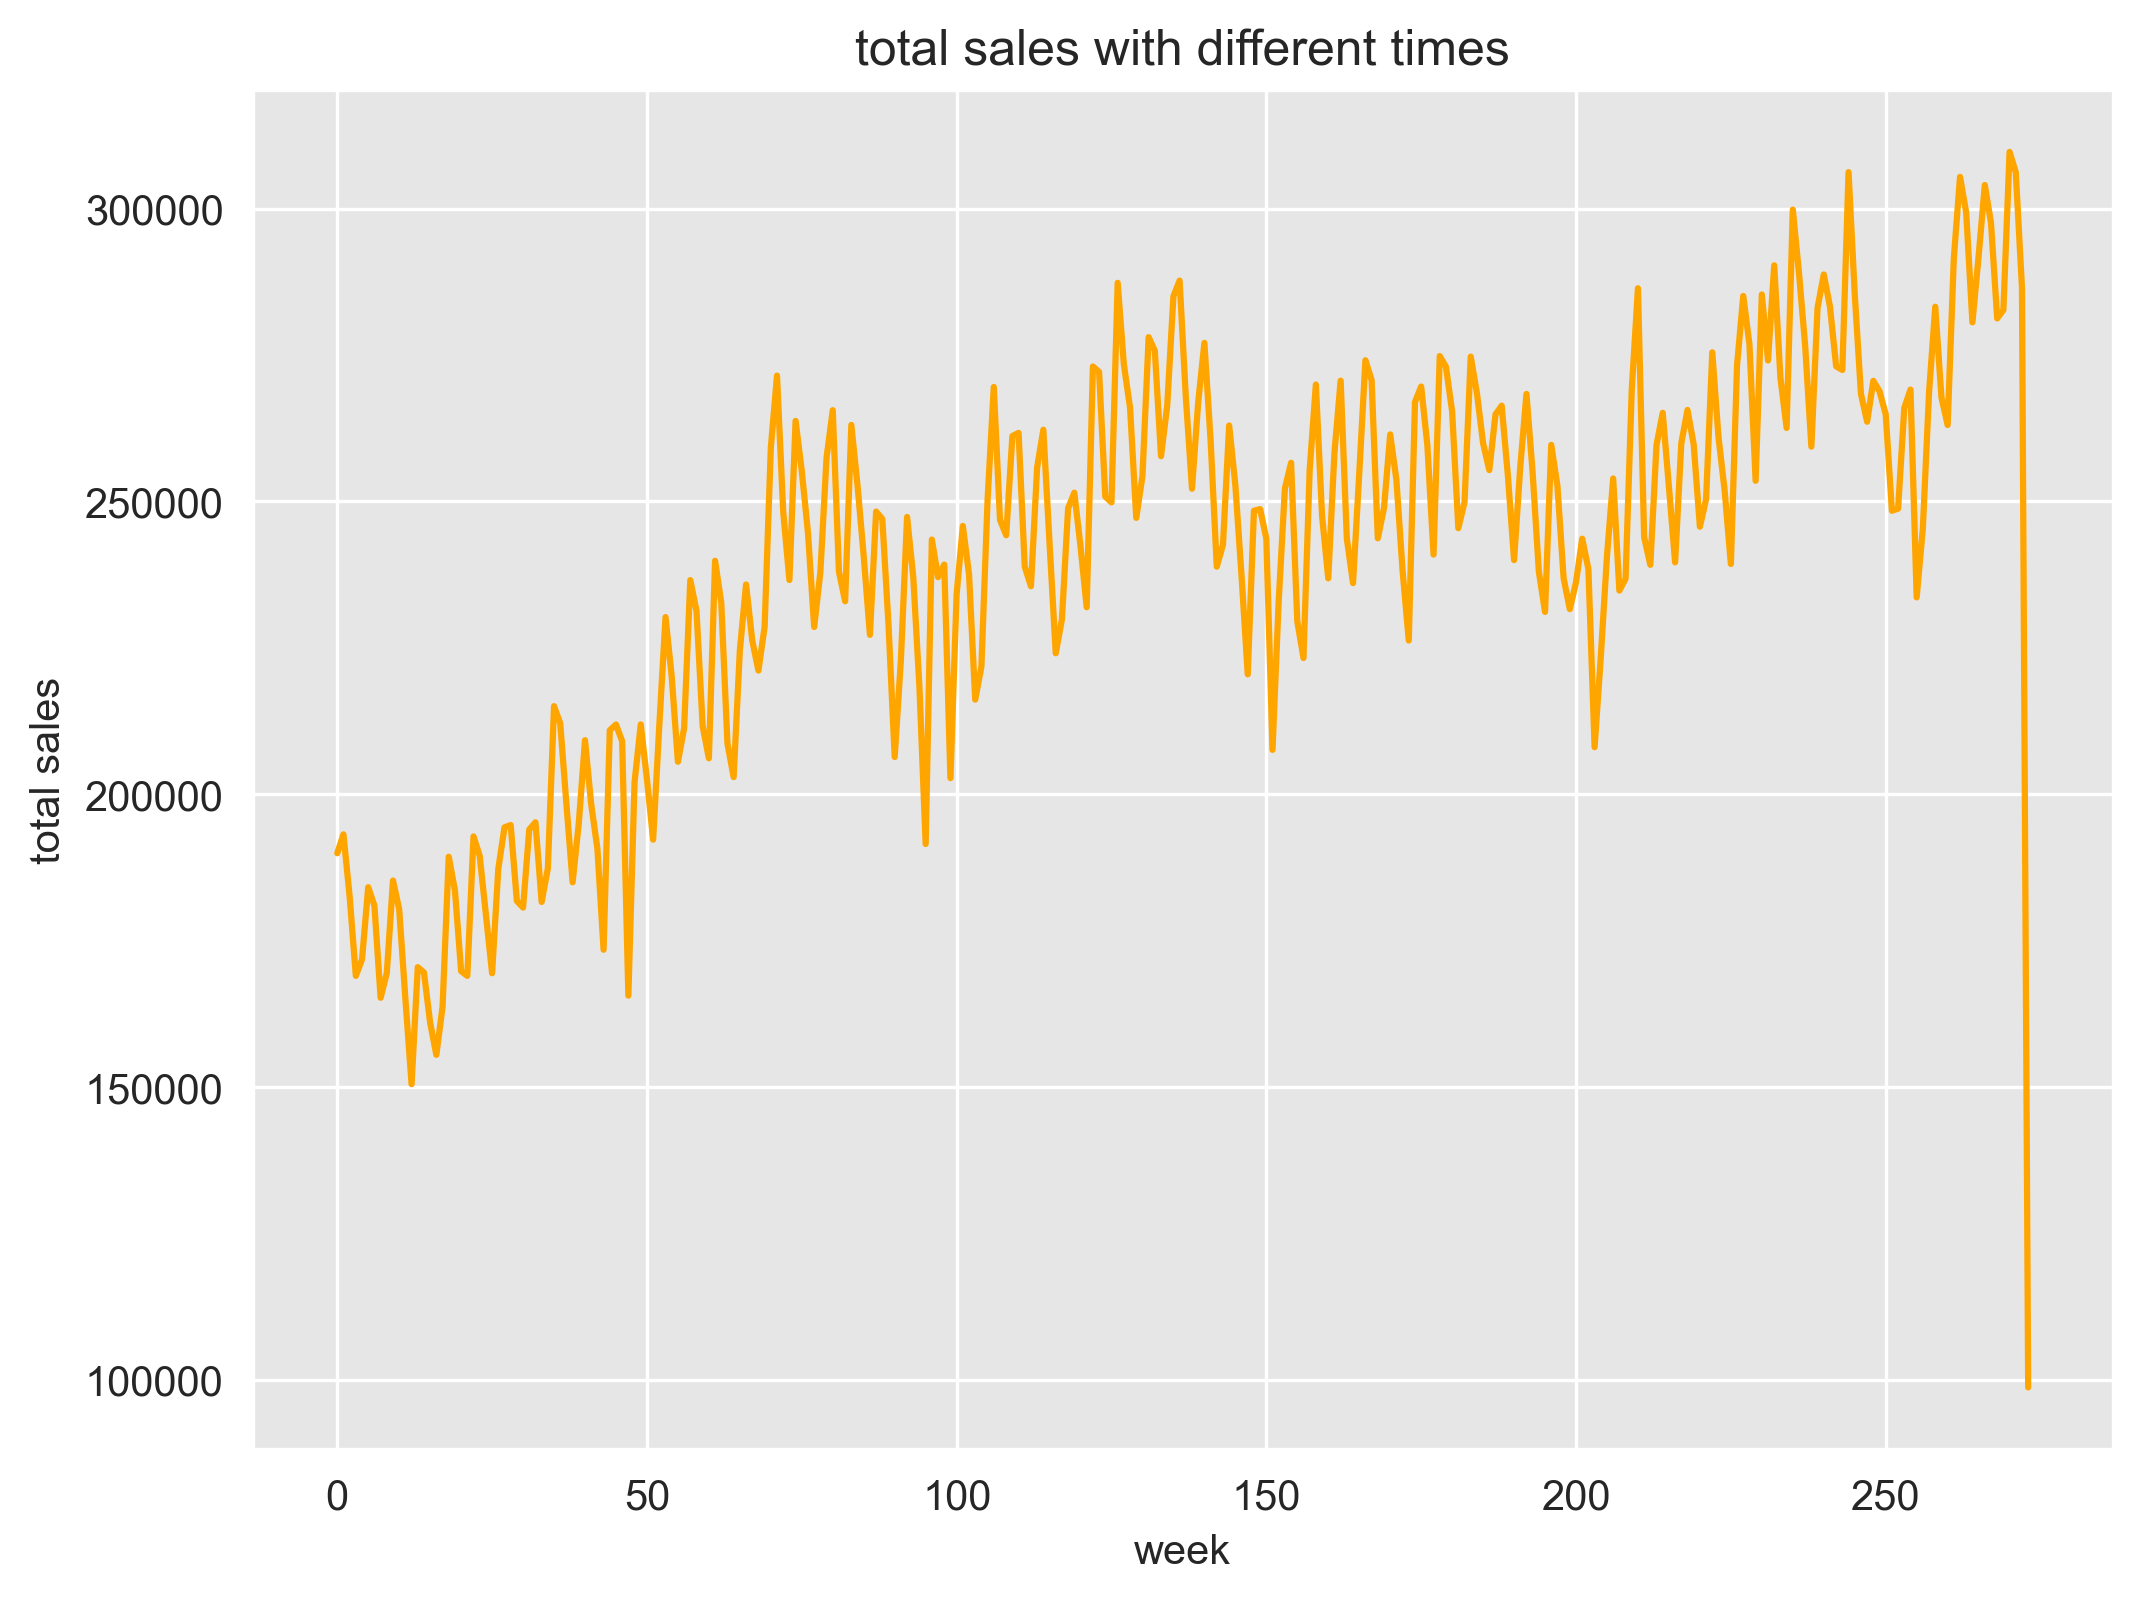

In [ ]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(8,6))
g['total sales'].plot(kind='line',color='orange')
plt.xlabel('week')
plt.ylabel("total sales")
plt.title('total sales with different times')
#plt.rcParams['savefig.dpi'] = 300
#plt.rcParams['figure.dpi'] = 300
#plt.savefig('1.png',dpi=900,bbox_inches='tight')  #save the file
plt.show()

### We have an overview of the relation between time and overall products. Next, we will break it down by product category and analyze it over time.

In [ ]:
cate=sales.groupby('cat_id').sum()
cate2=cate.T.reset_index()
cate2=cate2.drop('index',axis=1)
category=pd.concat([b,cate2],axis=1)
category['date'] =  pd.to_datetime(category['date'], format='%Y-%m-%d')

In [ ]:
category

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,FOODS,HOBBIES,HOUSEHOLD
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,23178,3764,5689
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0,22758,3357,5634
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0,17174,2682,3927
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0,18878,2669,3865
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1,14603,1814,2729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,2016-04-20,11612,Wednesday,5,4,2016,d_1909,NaN,NaN,NaN,NaN,0,0,0,23632,3472,8239
1909,2016-04-21,11612,Thursday,6,4,2016,d_1910,NaN,NaN,NaN,NaN,0,0,0,23317,3353,8363
1910,2016-04-22,11612,Friday,7,4,2016,d_1911,NaN,NaN,NaN,NaN,0,0,0,26704,4085,9728
1911,2016-04-23,11613,Saturday,1,4,2016,d_1912,NaN,NaN,NaN,NaN,0,0,0,31927,4787,12248


In [ ]:
d_cate=category.groupby(["month"])[['FOODS','HOBBIES','HOUSEHOLD']].mean().reset_index()
d_cate

,month,FOODS,HOBBIES,HOUSEHOLD
0,1,23504.430380,3137.917722,7190.000000
1,2,23599.129412,3289.094118,7756.417647
2,3,23406.752688,3220.096774,7712.989247
3,4,23356.959770,3312.620690,7589.103448
4,5,22307.845161,3158.051613,7037.954839
5,6,24177.140000,3311.213333,7513.060000
6,7,24295.219355,3186.858065,7640.341935
7,8,24704.006452,3116.361290,8126.277419
8,9,24378.713333,3026.580000,8073.966667
9,10,23680.264516,3275.290323,7757.922581


<Figure size 2400x1800 with 0 Axes>

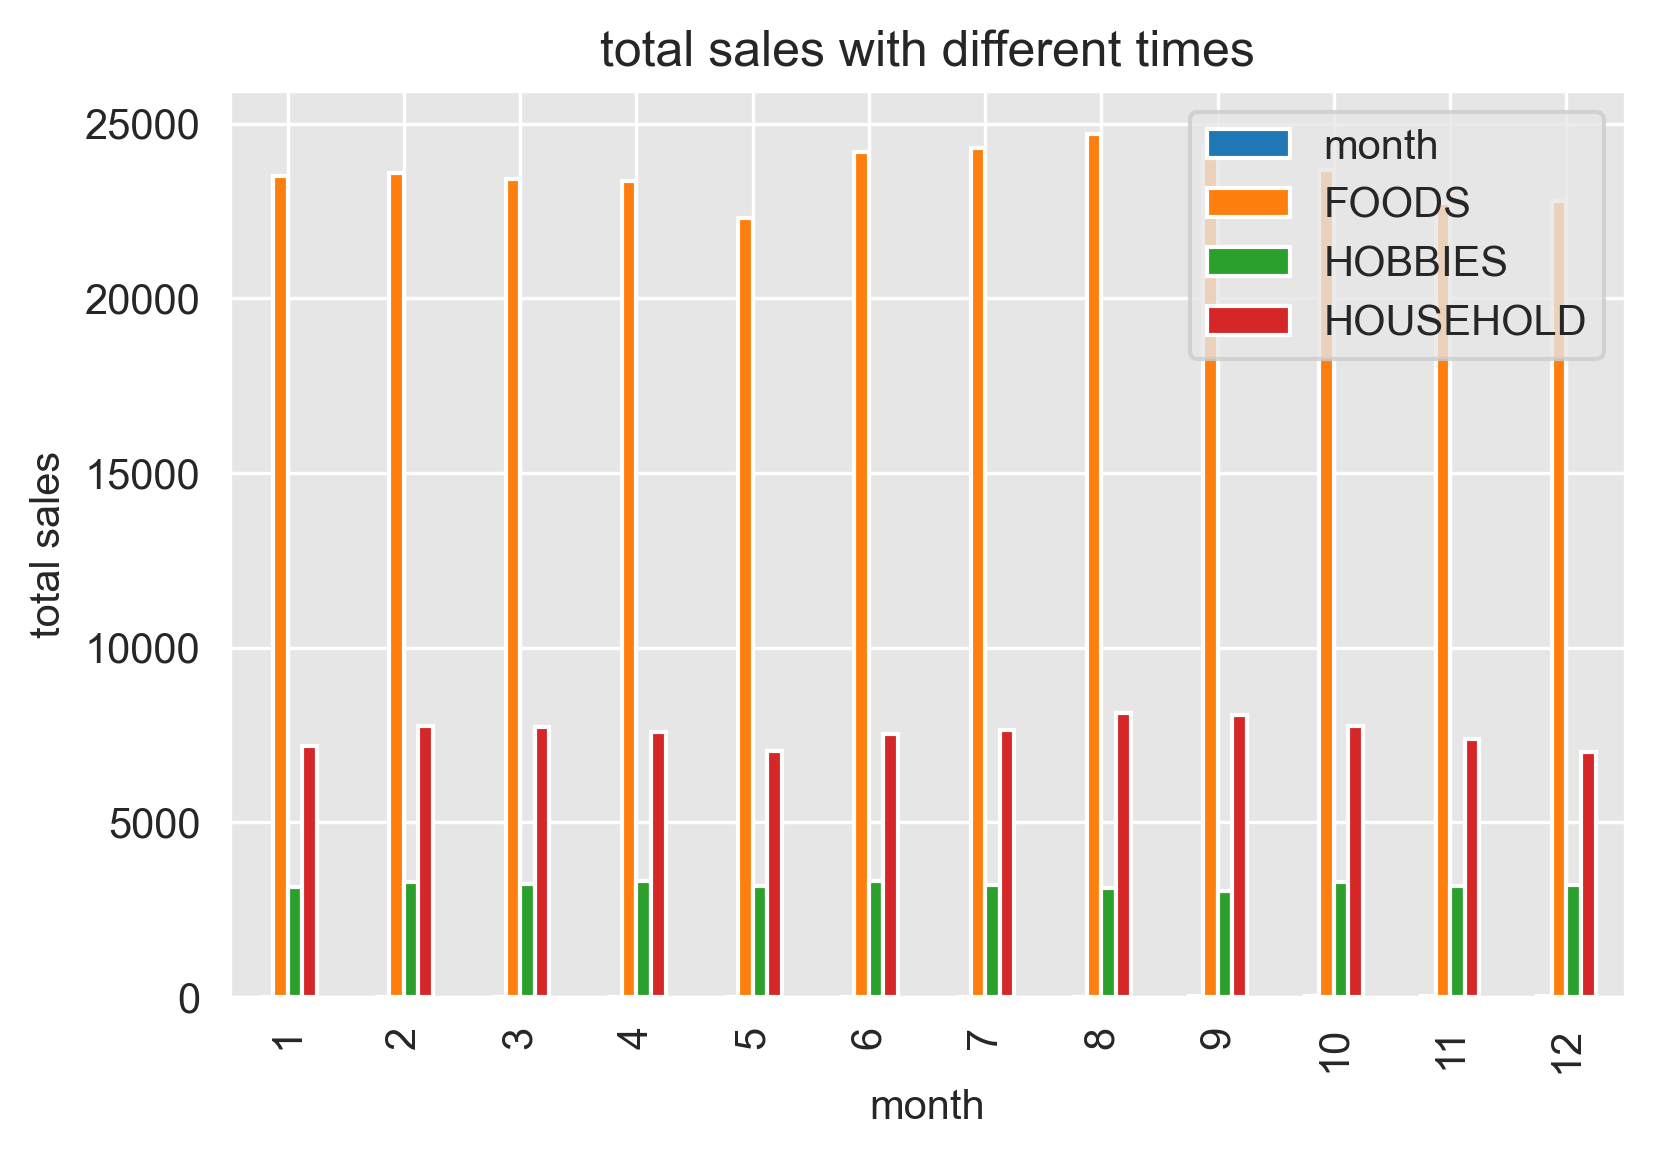

In [ ]:
d_cate.index=d_cate['month']
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(8,6))
d_cate.plot(kind='bar')
plt.xlabel('month')
plt.ylabel("total sales")
plt.title('total sales with different times')
#plt.rcParams['savefig.dpi'] = 300
#plt.rcParams['figure.dpi'] = 300
#plt.savefig('1.png',dpi=900,bbox_inches='tight')  #save the file
plt.show()

The trend of each category is similar to the overall trend.

In [ ]:
e_cate=category.groupby(["weekday"])[['FOODS','HOBBIES','HOUSEHOLD']].sum().reset_index()
e_cate

,weekday,FOODS,HOBBIES,HOUSEHOLD
0,Friday,6351112,907405,2085177
1,Monday,6206765,813632,1948463
2,Saturday,7693153,1076911,2613785
3,Sunday,7767048,976586,2525992
4,Thursday,5683848,786135,1775984
5,Tuesday,5736838,777821,1776018
6,Wednesday,5651175,786310,1755251


<Figure size 2400x1800 with 0 Axes>

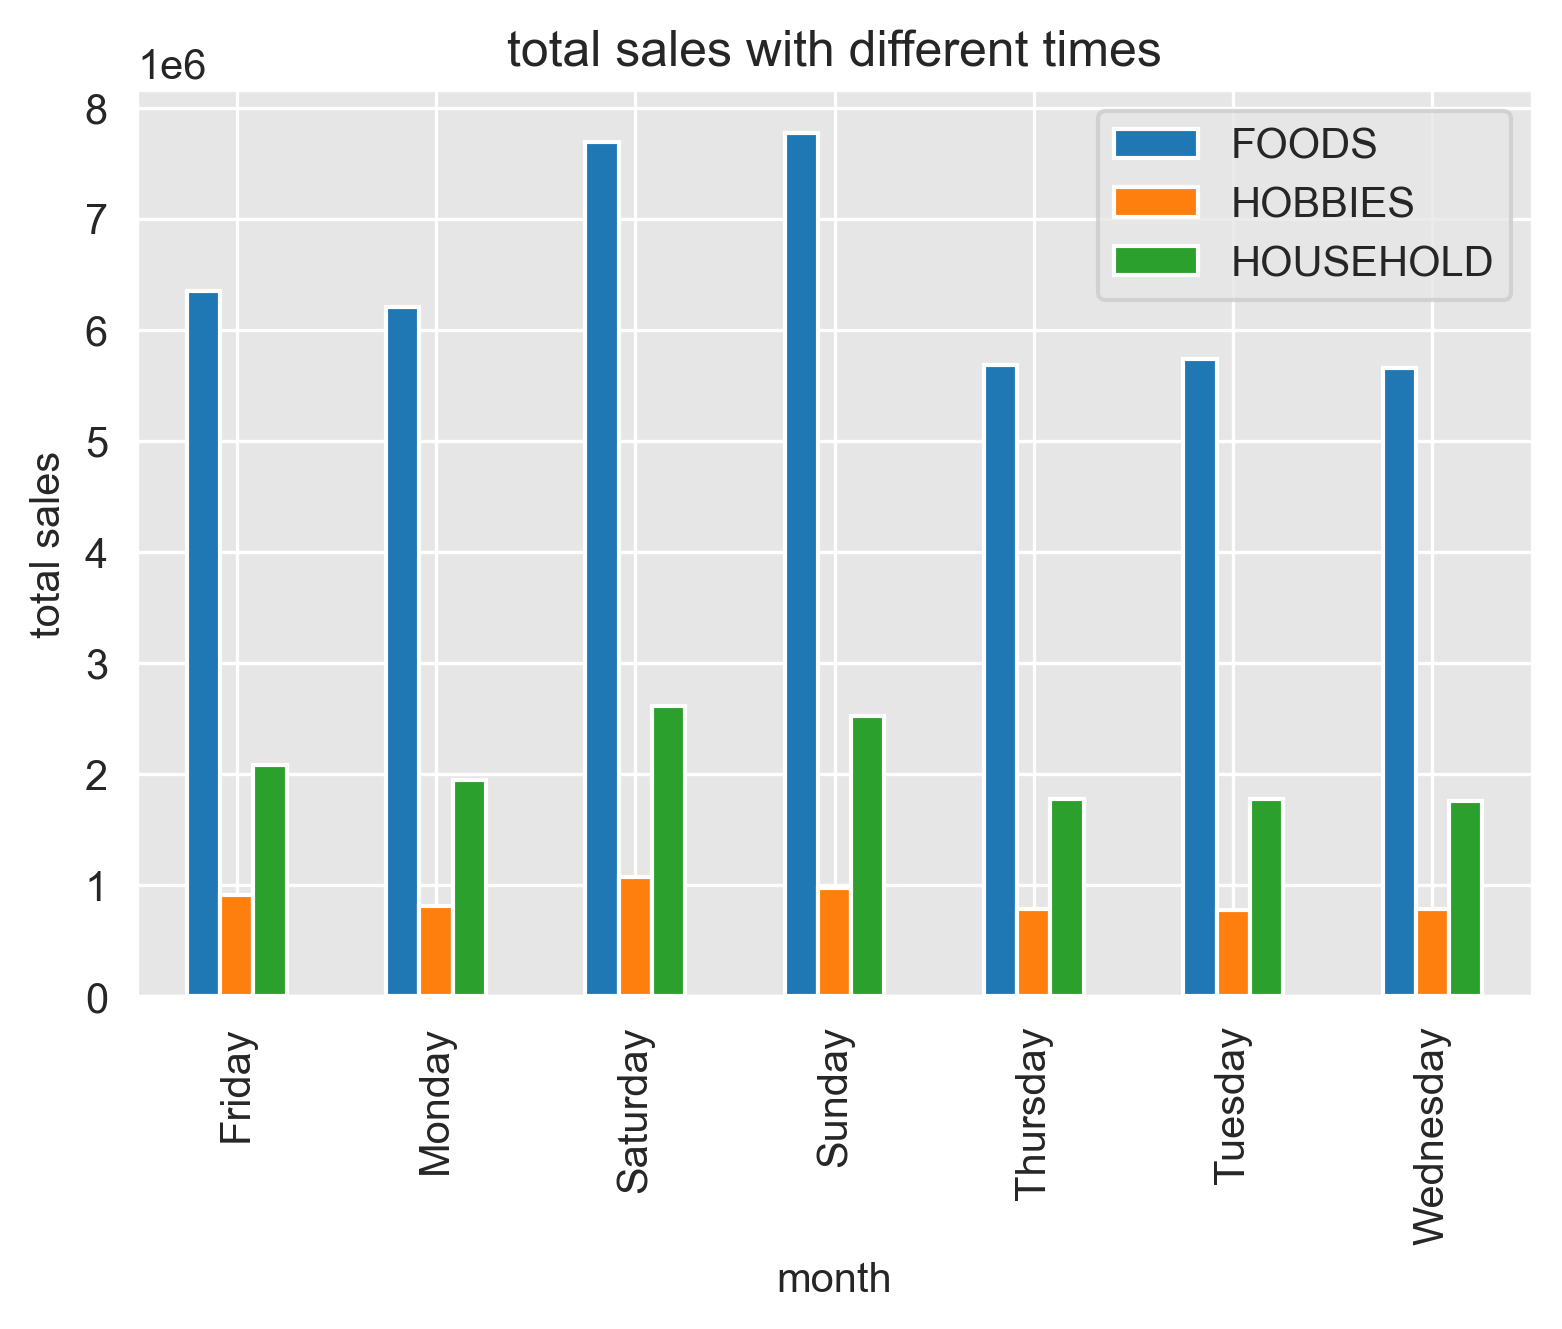

In [ ]:
e_cate.index=e_cate['weekday']
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(8,6))
e_cate.plot(kind='bar')
plt.xlabel('month')
plt.ylabel("total sales")
plt.title('total sales with different times')
#plt.rcParams['savefig.dpi'] = 300
#plt.rcParams['figure.dpi'] = 300
#plt.savefig('1.png',dpi=900,bbox_inches='tight')  #存檔
plt.show()

The trend of each category is similar to the overall trend.

In [ ]:
f_cate=category.groupby(["year"])[['FOODS','HOBBIES','HOUSEHOLD']].mean().reset_index()
f_cate

,year,FOODS,HOBBIES,HOUSEHOLD
0,2011,18572.296736,2786.798220,4921.572700
1,2012,23661.934426,2622.505464,6671.398907
2,2013,24634.197260,3309.750685,8044.416438
3,2014,24645.273973,3243.413699,7973.712329
4,2015,24695.493151,3808.643836,9306.304110
5,2016,27564.739130,3858.713043,9886.521739


<Figure size 2400x1800 with 0 Axes>

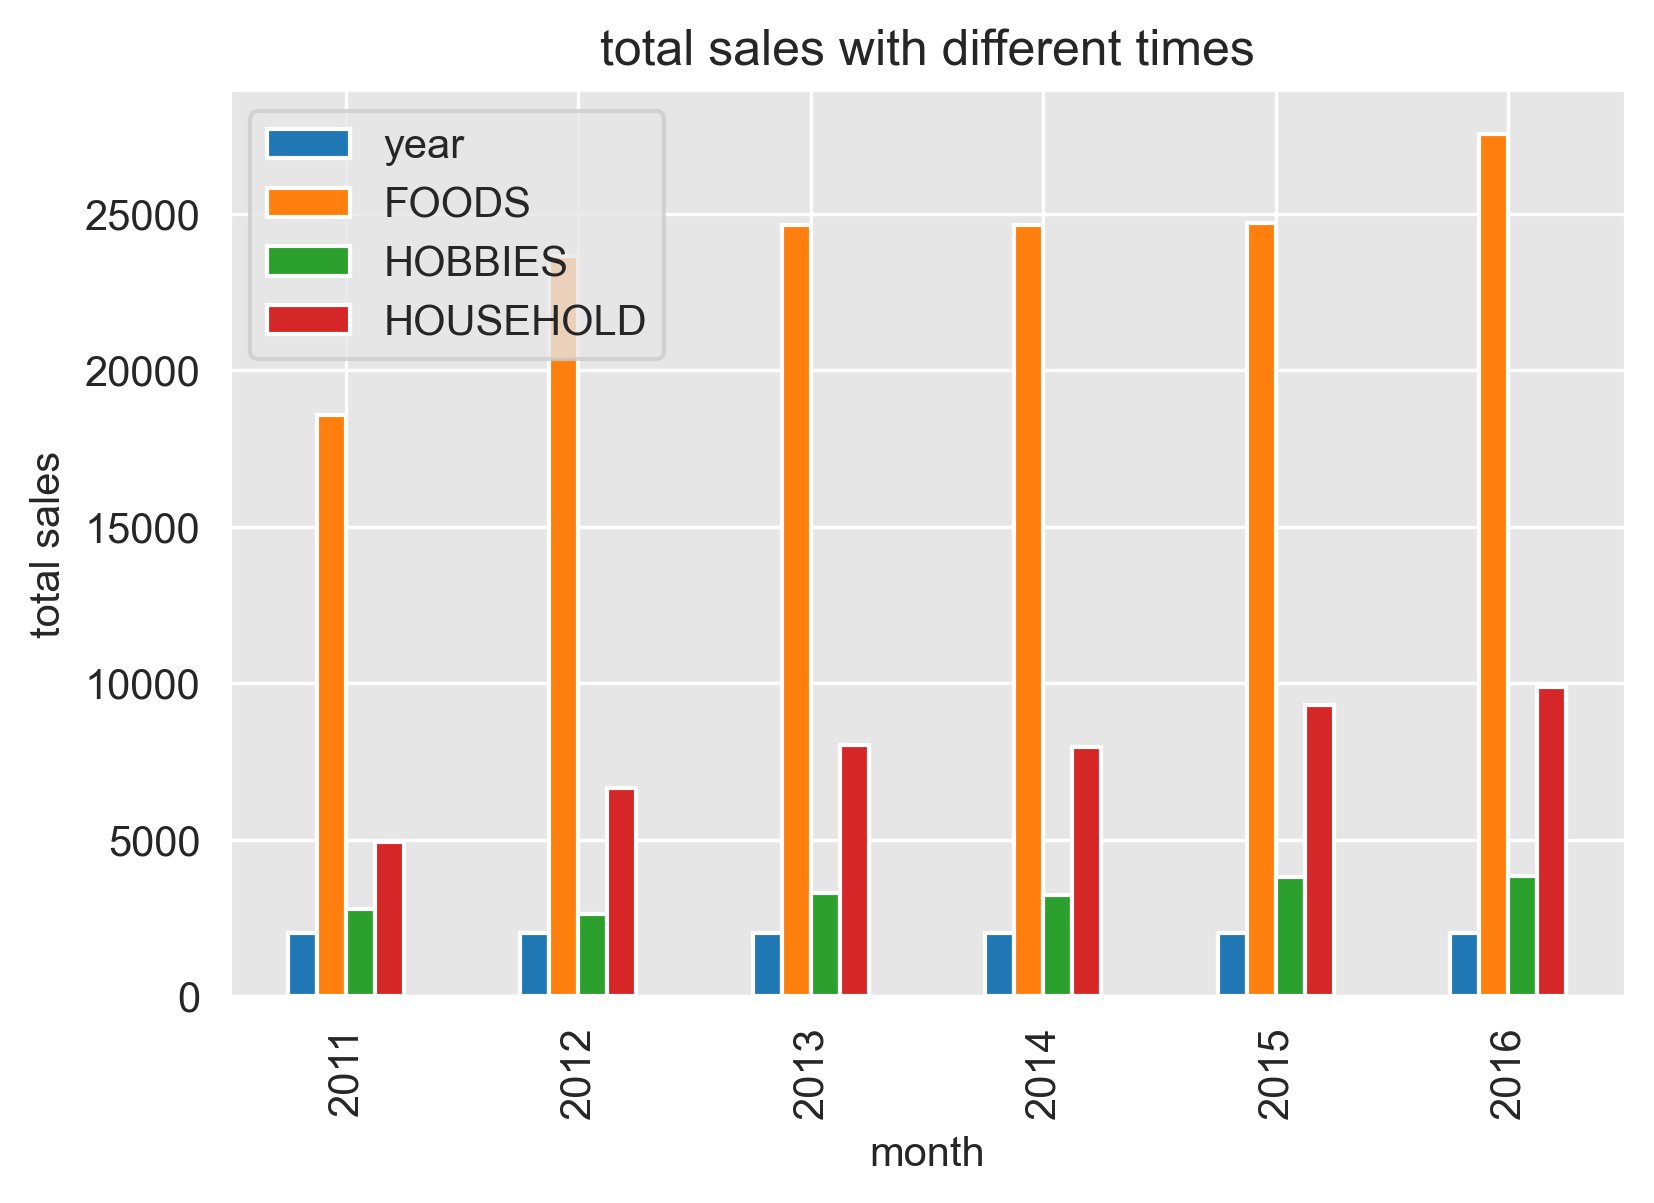

In [ ]:
f_cate.index=f_cate['year']
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(8,6))
f_cate.plot(kind='bar')
plt.xlabel('month')
plt.ylabel("total sales")
plt.title('total sales with different times')
#plt.rcParams['savefig.dpi'] = 300
#plt.rcParams['figure.dpi'] = 300
#plt.savefig('1.png',dpi=900,bbox_inches='tight')  #save the file
plt.show()

The trend of each category is similar to the overall trend.

In [ ]:
h_cate=category.groupby(["year","month"])[['FOODS','HOBBIES','HOUSEHOLD']].sum().reset_index()

<Figure size 2400x1800 with 0 Axes>

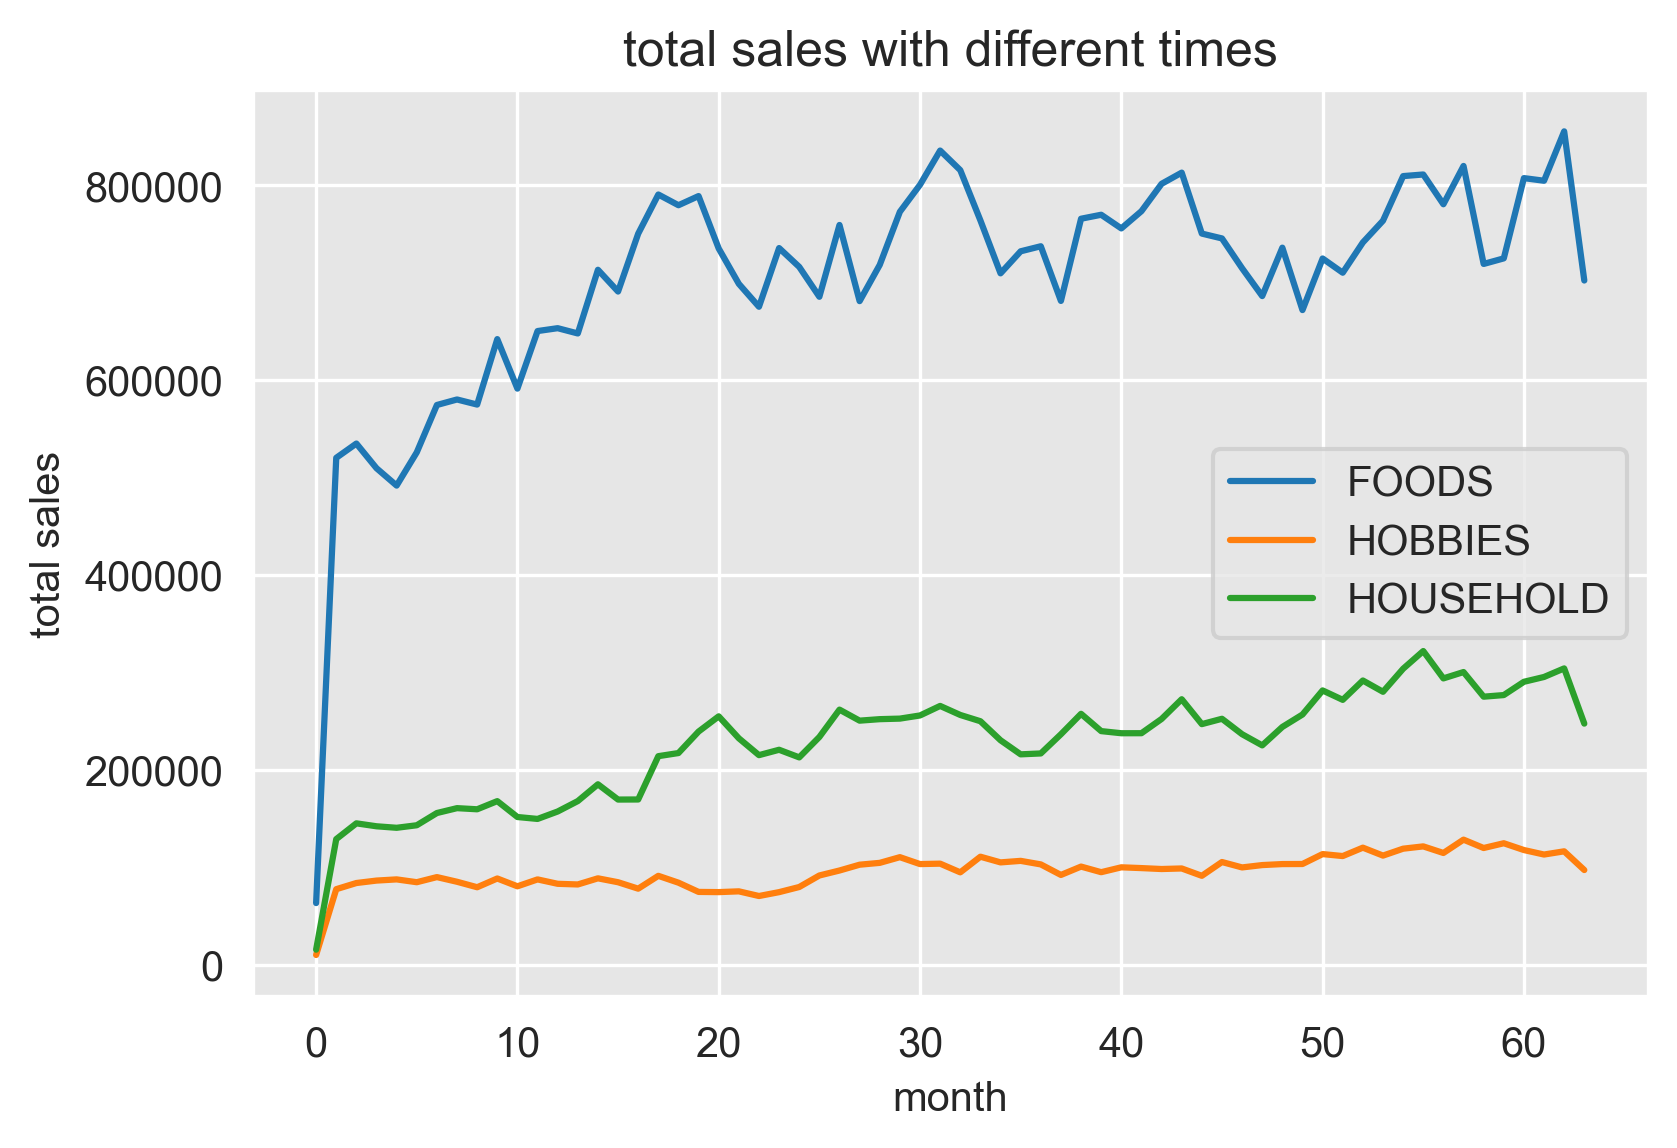

In [ ]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(8,6))
h_cate[['FOODS','HOBBIES','HOUSEHOLD']].plot(kind='line')
plt.xlabel('month')
plt.ylabel("total sales")
plt.title('total sales with different times')
#plt.rcParams['savefig.dpi'] = 300
#plt.rcParams['figure.dpi'] = 300
#plt.savefig('1.png',dpi=900,bbox_inches='tight')  #save the file
plt.show()

<Figure size 2400x1800 with 0 Axes>

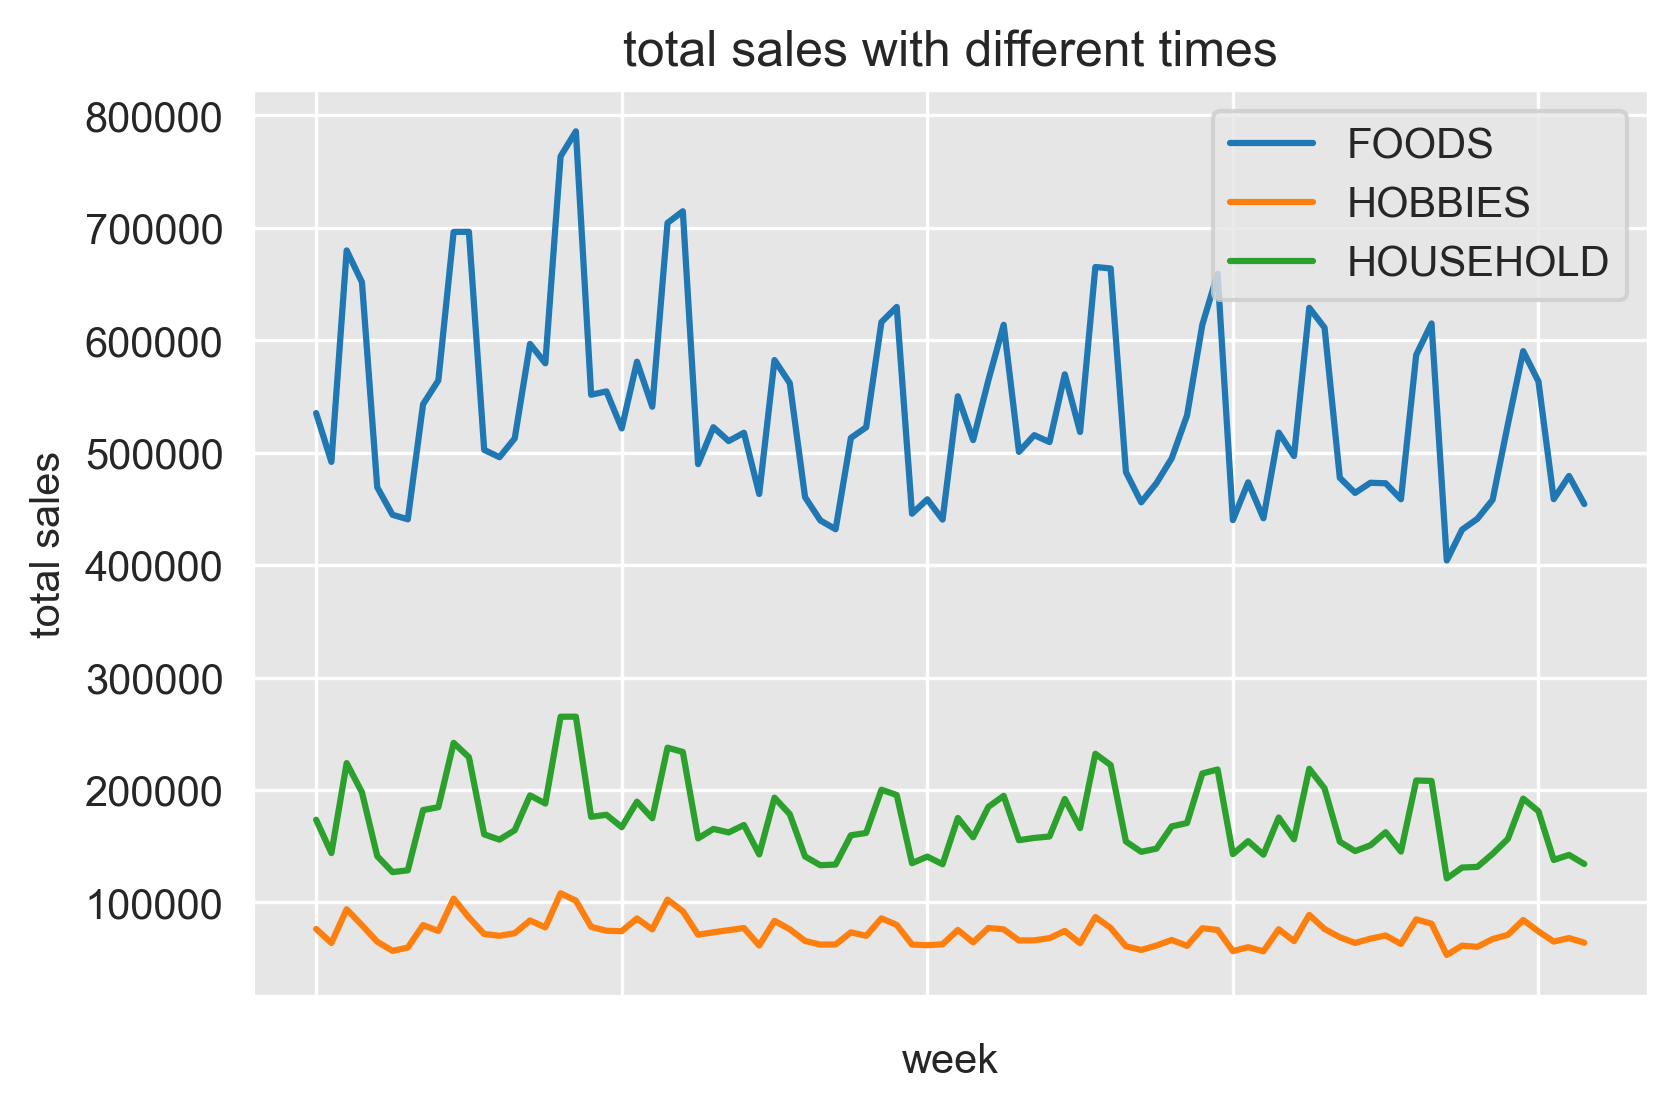

In [ ]:
#plt.rcParams.update(plt.rcParamsDefault)
i_cate.index=i['month-weekday']
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(8,6))
ax=i_cate[['FOODS','HOBBIES','HOUSEHOLD']].plot()
plt.xlabel('week')
plt.ylabel("total sales")
plt.title('total sales with different times')
ax.set_xticklabels('',size=7)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
#plt.savefig('1.png',dpi=900,bbox_inches='tight')  #save the file
plt.show()

#### We can see that the overall trends are similar, but FOODS has the largest fluctuations, followed by HOBBIES, while HOUSEHOLD is the most stable.

## Analyze the relationship between sales volume and its past periods

In [ ]:
sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,d_45,d_46,d_47,d_48,d_49,d_50,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70,d_71,d_72,d_73,d_74,d_75,d_76,d_77,d_78,d_79,d_80,d_81,d_82,d_83,d_84,d_85,d_86,d_87,d_88,d_89,d_90,d_91,d_92,d_93,d_94,d_95,d_96,d_97,d_98,d_99,d_100,d_101,d_102,d_103,d_104,d_105,d_106,d_107,d_108,d_109,d_110,d_111,d_112,d_113,d_114,d_115,d_116,d_117,d_118,d_119,d_120,d_121,d_122,d_123,d_124,d_125,d_126,d_127,d_128,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,d_154,d_155,d_156,d_157,d_158,d_159,d_160,d_161,d_162,d_163,d_164,d_165,d_166,d_167,d_168,d_169,d_170,d_171,d_172,d_173,d_174,d_175,d_176,d_177,d_178,d_179,d_180,d_181,d_182,d_183,d_184,d_185,d_186,d_187,d_188,d_189,d_190,d_191,d_192,d_193,d_194,d_195,d_196,d_197,d_198,d_199,d_200,d_201,d_202,d_203,d_204,d_205,d_206,d_207,d_208,d_209,d_210,d_211,d_212,d_213,d_214,d_215,d_216,d_217,d_218,d_219,d_220,d_221,d_222,d_223,d_224,d_225,d_226,d_227,d_228,d_229,d_230,d_231,d_232,d_233,d_234,d_235,d_236,d_237,d_238,d_239,d_240,d_241,d_242,d_243,d_244,d_245,d_246,d_247,d_248,d_249,d_250,d_251,d_252,d_253,d_254,d_255,d_256,d_257,d_258,d_259,d_260,d_261,d_262,d_263,d_264,d_265,d_266,d_267,d_268,d_269,d_270,d_271,d_272,d_273,d_274,d_275,d_276,d_277,d_278,d_279,d_280,d_281,d_282,d_283,d_284,d_285,d_286,d_287,d_288,d_289,d_290,d_291,d_292,d_293,d_294,d_295,d_296,d_297,d_298,d_299,d_300,d_301,d_302,d_303,d_304,d_305,d_306,d_307,d_308,d_309,d_310,d_311,d_312,d_313,d_314,d_315,d_316,d_317,d_318,d_319,d_320,d_321,d_322,d_323,d_324,d_325,d_326,d_327,d_328,d_329,d_330,d_331,d_332,d_333,d_334,d_335,d_336,d_337,d_338,d_339,d_340,d_341,d_342,d_343,d_344,d_345,d_346,d_347,d_348,d_349,d_350,d_351,d_352,d_353,d_354,d_355,d_356,d_357,d_358,d_359,d_360,d_361,d_362,d_363,d_364,d_365,d_366,d_367,d_368,d_369,d_370,d_371,d_372,d_373,d_374,d_375,d_376,d_377,d_378,d_379,d_380,d_381,d_382,d_383,d_384,d_385,d_386,d_387,d_388,d_389,d_390,d_391,d_392,d_393,d_394,d_395,d_396,d_397,d_398,d_399,d_400,d_401,d_402,d_403,d_404,d_405,d_406,d_407,d_408,d_409,d_410,d_411,d_412,d_413,d_414,d_415,d_416,d_417,d_418,d_419,d_420,d_421,d_422,d_423,d_424,d_425,d_426,d_427,d_428,d_429,d_430,d_431,d_432,d_433,d_434,d_435,d_436,d_437,d_438,d_439,d_440,d_441,d_442,d_443,d_444,d_445,d_446,d_447,d_448,d_449,d_450,d_451,d_452,d_453,d_454,d_455,d_456,d_457,d_458,d_459,d_460,d_461,d_462,d_463,d_464,d_465,d_466,d_467,d_468,d_469,d_470,d_471,d_472,d_473,d_474,d_475,d_476,d_477,d_478,d_479,d_480,d_481,d_482,d_483,d_484,d_485,d_486,d_487,d_488,d_489,d_490,d_491,d_492,d_493,d_494,...,d_1414,d_1415,d_1416,d_1417,d_1418,d_1419,d_1420,d_1421,d_1422,d_1423,d_1424,d_1425,d_1426,d_1427,d_1428,d_1429,d_1430,d_1431,d_1432,d_1433,d_1434,d_1435,d_1436,d_1437,d_1438,d_1439,d_1440,d_1441,d_1442,d_1443,d_1444,d_1445,d_1446,d_1447,d_1448,d_1449,d_1450,d_1451,d_1452,d_1453,d_1454,d_1455,d_1456,d_1457,d_1458,d_1459,d_1460,d_1461,d_1462,d_1463,d_1464,d_1465,d_1466,d_1467,d_1468,d_1469,d_1470,d_1471,d_1472,d_1473,d_1474,d_1475,d_1476,d_1477,d_1478,d_1479,d_1480,d_1481,d_1482,d_1483,d_1484,d_1485,d_1486,d_1487,d_1488,d_1489,d_1490,d_1491,d_1492,d_1493,d_1494,d_1495,d_1496,d_1497,d_1498,d_1499,d_1500,d_1501,d_1502,d_1503,d_1504,d_1505,d_1506,d_1507,d_1508,d_1509,d_1510,d_1511,d_1512,d_1513,d_1514,d_1515,d_1516,d_1517,d_1518,d_1519,d_1520,d_1521,d_1522,d_1523,d_1524,d_1525,d_1526,d_1527,d_1528,d_1529,d_1530,d_1531,d_1532,d_1533,d_1534,d_1535,d_1536,d_1537,d_1538,d_1539,d_1540,d_1541,d_1542,d_1543,d_1544,d_1545,d_1546,d_1547,d_1548,d_1549,d_1550,d_1551,d_1552,d_1553,d_1554,d_1555,d_1556,d_1557,d_1558,d_1559,d_1560,d_1561,d_1562,d_1563,d_1564,d_1565,d_1566,d_1567,d_1568,d_1569,d_1

In [ ]:
ww=sales[sales['state_id']=='TX']
ww= ww[sales['cat_id']=='FOODS']
www=ww.sum(axis=0)
www=pd.DataFrame(www)
www=www.reset_index()
www=www[6:]
www.columns=['day','sale']
www=www.reset_index().drop('index',axis=1)
www['sale']=www['sale'].astype('int')
www['t']=list(range(1,1914))

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import linregress

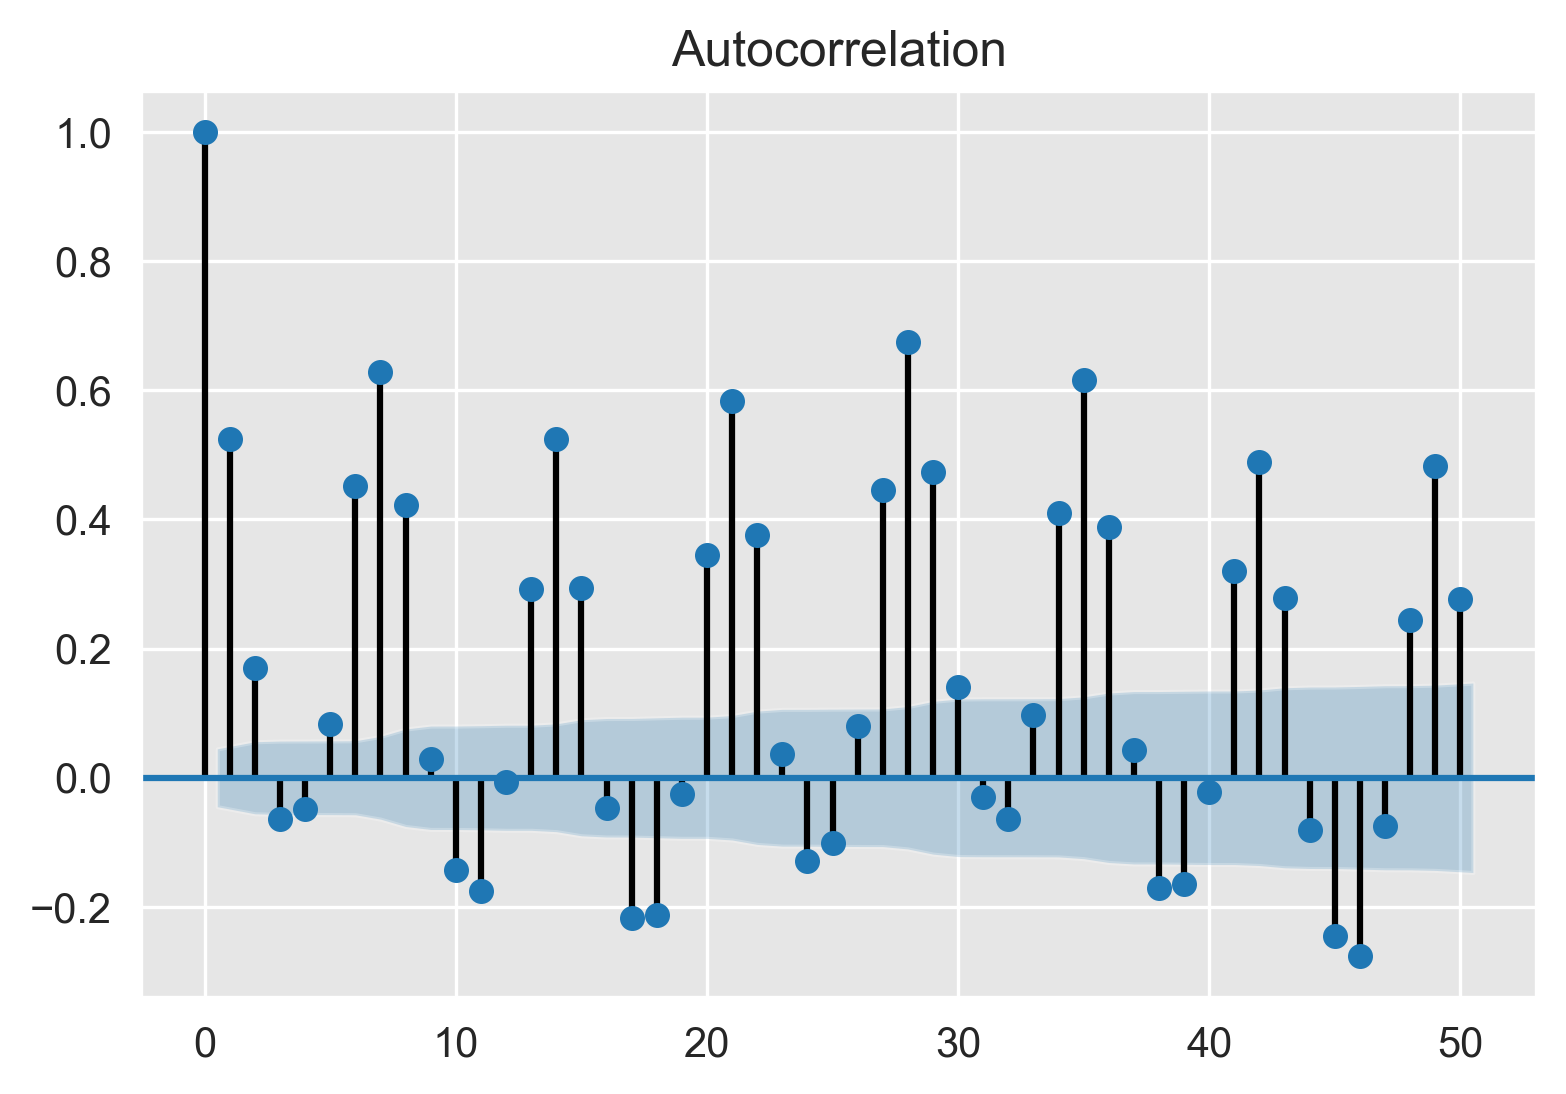

In [ ]:
plot_acf(www['sale'],lags=50)
plt.show()

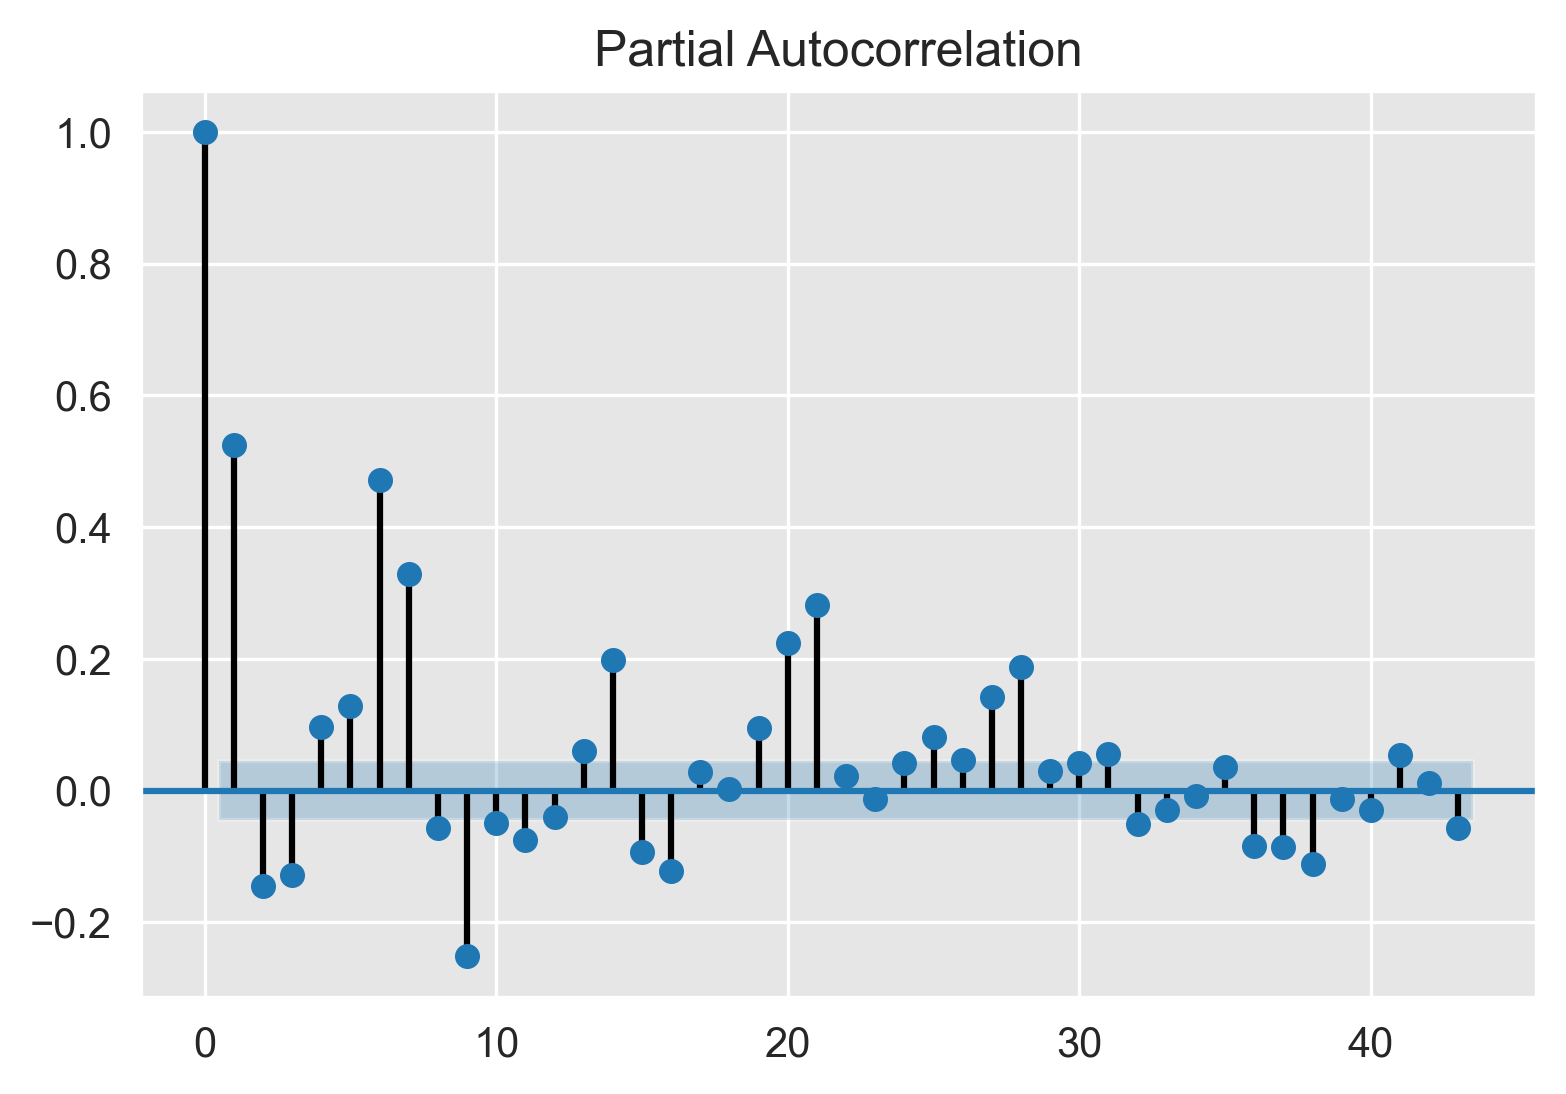

In [ ]:
plot_pacf(www['sale'],lags=43)
plt.show()

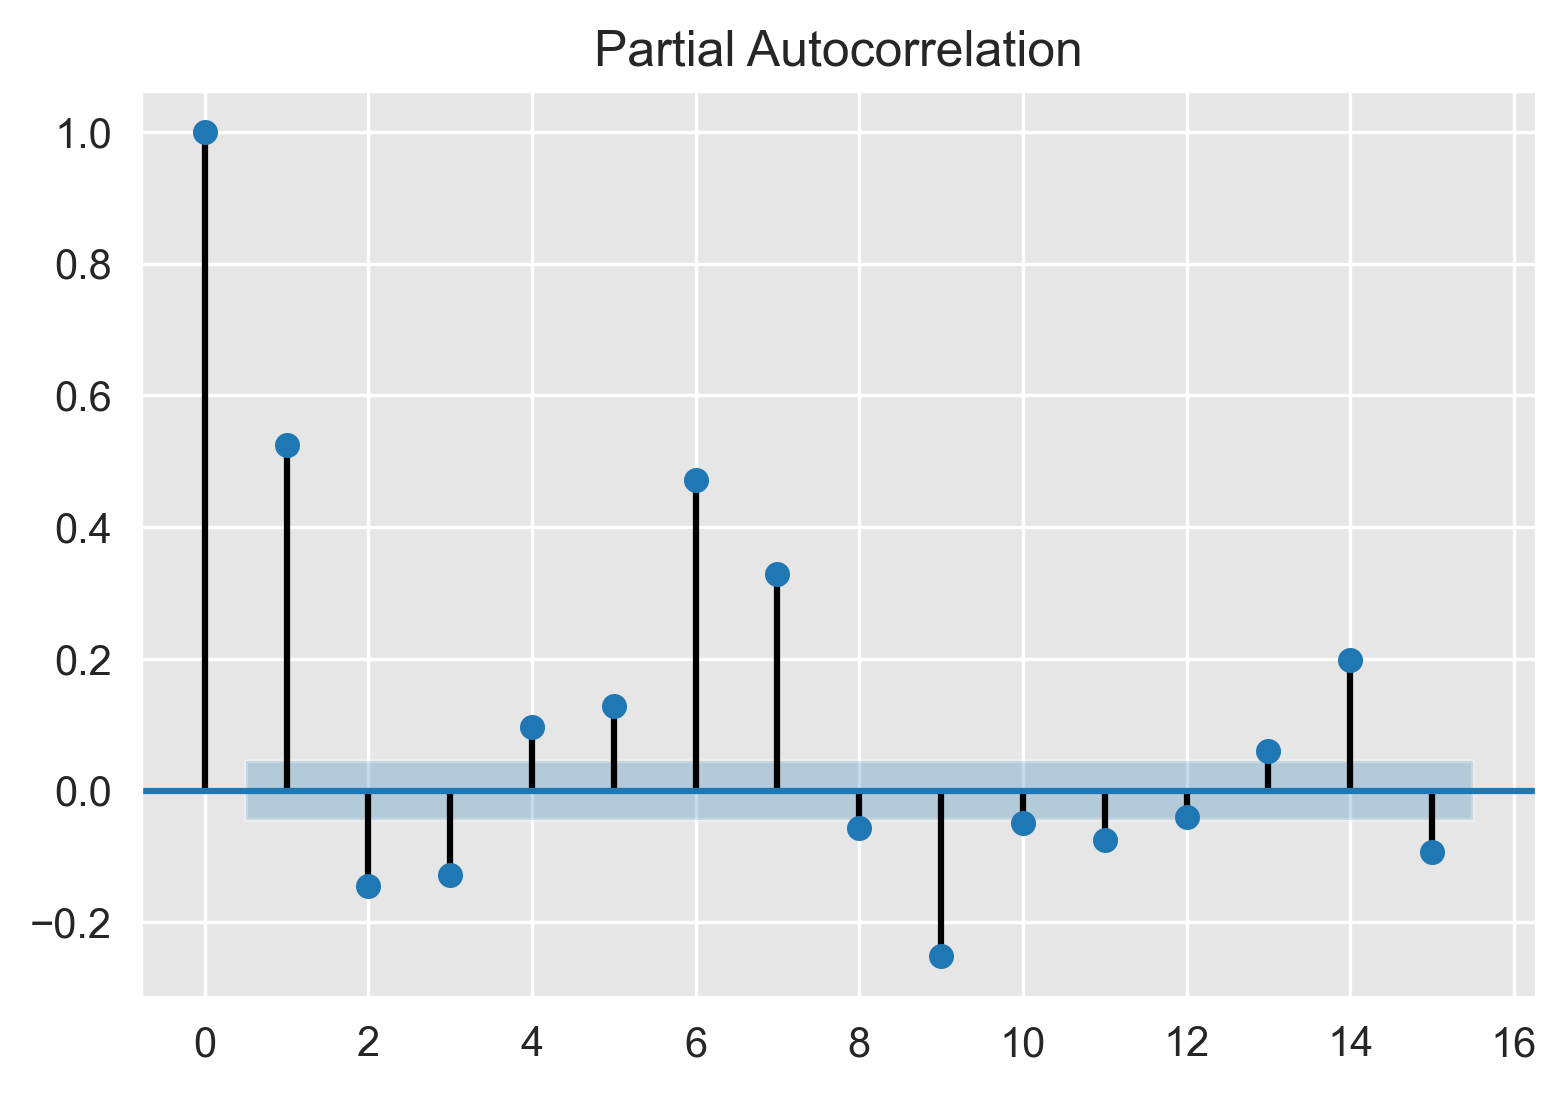

In [ ]:
plot_pacf(www['sale'],lags=15)
plt.show()

#### From the above, we can infer that the sales volume for the current period is likely highly correlated with the sales volume on the same day of the previous week.